# Melting and Crystalisation

Trace elements can be used effectively to understand igneous processes – this is because trace element fractionation is governed by the mineral phases present, which in turn are governed by pressure, temperature and chemical composition.

Precise trace element data can be obtained on small samples or *in situ* with ion probes or by laser ablation-ICP-MS. Such data provide unprecedented insights into igneous processes.

There are a wide variety of quantitative models that attempt to describe trace element behavior during partial melting and crystal fractionation. In the following, we will discuss and apply the simplest but still very useful form of models.

In [64]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from math import log10, floor

In [81]:
# create our own functions

# function to calculate the bulk distribution coefficient of an element in a rock
# make sure the orders of values for each mineral are correct
def bulk_distribution_coefficient_calculator(minerals_percentages_list, KD_list):
    minerals_percentages_array = np.array(minerals_percentages_list)
    KD_array = np.array(KD_list)
    D = np.sum(minerals_percentages_array/100*KD_array)
    return D


# function to round a value to a certain number of significant figures
def round_to_n_sf(value, no_of_significant_figures):
    value_rounded = round(value, no_of_significant_figures-1-int(floor(log10(abs(value)))))
    return value_rounded
            


## Batch (equilibrium) melting
```{index} Batch (equilibrium) melting
```
Batch melting involves complete equilibration between the solid phase (rock) and the melt (liquid) that is produced. This yields the following mass balance for the concentrations of an element:

$$C_0 = C_L F + C_S (1-F)$$

where 

   * $C_0$ is the original concentration of the solid (and the whole system), 
   * $C_L$ is the concentration of the liquid, 
   * $C_S$ is the concentration of the solid,  
   * $F$ is the melt fraction (= (mass of melt)/(mass of system))
   
With the definition of a distribution coefficient $D = \frac{C_S}{C_L}$, this can be rearranged to:

$$C_0 = C_L F + C_L D (1-F)$$

$$\therefore \frac{C_L}{C_0} = \frac{1}{F + D(1-F)}$$

The equation above describes the enrichment or depletion of a trace element in a melt (relative to the original state in the unmolten solid) as a function of the degree of melting. We can plot it to see the change of the ratio of $C_L$ and $C_0$ as a rock is melting ($F$ increases).

In [66]:
# function for calculating the CL/C0 ratio of melt from batch melting
def ratio_CL_C0_batch_melting(F, D):
    return 1/(F+D*(1-F))

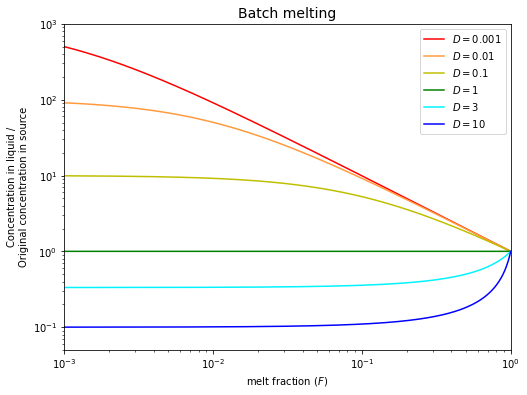

In [67]:
# Plot of CL/C0 against F at various D
plt.figure(figsize=(8,6))
F = np.linspace(0.001, 1, 10000)
D = [0.001, 0.01, 0.1, 1, 3, 10]
colors = ['r', '#FF9B3C', 'y', 'g', '#00F3FF', 'b']
for i in range(len(D)):
    ratio_CL_C0 = ratio_CL_C0_batch_melting(F, D[i])
    plt.plot(F, ratio_CL_C0, colors[i], label=f"$D={D[i]}$")
plt.xlabel('melt fraction ($F$)')
plt.ylabel('Concentration in liquid /\nOriginal concentration in source')
plt.xlim([0.001, 1])
plt.ylim([0.05, 1000])
plt.xscale("log")
plt.yscale("log")
plt.title('Batch melting', fontsize=14)
plt.legend(loc='best', fontsize=10)

It is useful to consider and discuss three special cases of partial melting:

   * If $D << F$, then $\frac{C_L}{C_0}\approx\frac{1}{F}$. The degree of enrichment for a highly incompatible trace element is inversely proportional to the degree of melting.
   * As $F$ approaches $0$ (very little melting), then $\frac{C_L}{C_0}\approx\frac{1}{D}$. This means that the degree of enrichment depends on the compatibility of an element. The maximum enrichment that can be achieved is $\frac{1}{D}$.
   * If $D$ is large ($>1$; compatible element), the depletion in the melt is $\frac{1}{D}$ when $F$ is small. This result is relatively insensitive to $F$.

Given this relationship:

$$\frac{C_L}{C_0} = \frac{1}{F + D(1-F)}$$

and

$$D = \frac{C_S}{C_L}$$

The trace element concentration of the residual solid rock that is in equilibrium with a partial batch equilibrium melt is straightforward to calculate: 

$$\frac{C_S}{C_0} = \frac{D}{F + D(1-F)} = \frac{C_LD}{C_0}$$

## Fractional melting
```{index} Fractional melting
```
If melting is very rapid and the liquids are sufficiently low in viscosity, the melts can be quickly driven away from the source rock by buoyancy forces. In this case, the solid will be unable to equilibrate with the total amount of melt that is produced during the melting process. Hence we have incomplete equilibration between solid and melt.

For the modelling, we can treat this case as equilibration of the solid with an infinitesimally small amount of liquid. The mass balance of the system then yields the following equation:

$$\frac{C_{L, increment}}{C_0} = \frac{1}{D}(1-F)^{\frac{1}{D}-1}$$

This equation describes the composition of a **single melt increment** that is formed at a particular value of $F$.

In [68]:
# function for calculating the CL/C0 ratio of melt increment formed at a particular F
def ratio_CL_increment_C0_fractional_melting(F, D):
    return 1/D * (1-F)**(1/D - 1)

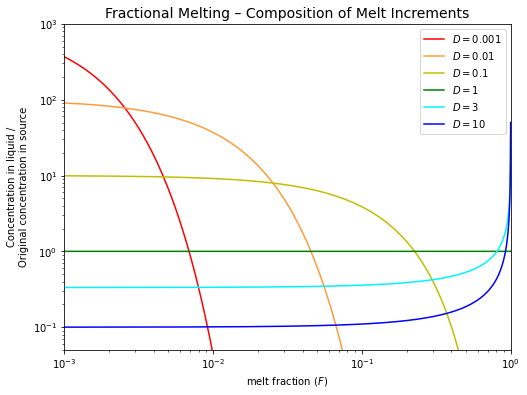

In [69]:
# Plot of CL/C0 against F at various D
plt.figure(figsize=(8,6))
F = np.linspace(0.001, 0.999, 10000)
D = [0.001, 0.01, 0.1, 1, 3, 10]
colors = ['r', '#FF9B3C', 'y', 'g', '#00F3FF', 'b']
for i in range(len(D)):
    ratio_CL_C0 = ratio_CL_increment_C0_fractional_melting(F, D[i])
    plt.plot(F, ratio_CL_C0, colors[i], label=f"$D={D[i]}$")
plt.xlabel('melt fraction ($F$)')
plt.ylabel('Concentration in liquid /\nOriginal concentration in source')
plt.xlim([0.001, 1])
plt.ylim([0.05, 1000])
plt.xscale("log")
plt.yscale("log")
plt.title('Fractional Melting – Composition of Melt Increments', fontsize=14)
plt.legend(loc='best', fontsize=10)

Note how quickly the concentrations of the incompatible elements ($D < 1$) decline in melt increments that are formed at higher degrees of partial melting (e.g., $F > 1\%$ for $D = 0.001$).

An **aggregate liquid** can be produced by mixing the various melt increments that are formed over the melting interval $F = 0$ to $F$. 

$$\frac{C_{L, aggregate}}{C_0} = \int_{0}^{F}\frac{C_{L, increment}}{C_0}dF = \int_{0}^{F}\frac{1}{D}(1-F)^{\frac{1}{D}-1}dF$$

So, the composition of this aggregate liquid is given by:

$$\frac{C_{L, aggregate}}{C_0} = \frac{1}{F}[1-(1-F)^{\frac{1}{D}}]$$

Note that aggregated fractional melts have compositions that are similar to batch melts for the same value of $F$.

Real melting probably lies somewhere between the two extremes of batch and fractional melting and is likely to be more complicated also!

In [70]:
# function for calculating the CL/C0 ratio of aggregate melt formed over the melting interval F=0 to F
def ratio_CL_aggregate_C0_fractional_melting(F, D):
    return 1/F * (1-(1-F)**(1/D))

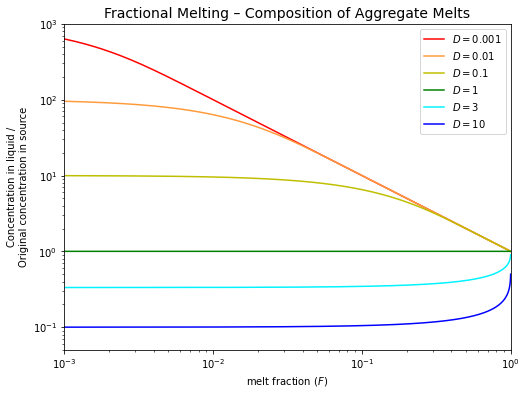

In [71]:
# Plot of CL/C0 against F at various D
plt.figure(figsize=(8,6))
F = np.linspace(0.001, 0.999, 10000)
D = [0.001, 0.01, 0.1, 1, 3, 10]
colors = ['r', '#FF9B3C', 'y', 'g', '#00F3FF', 'b']
for i in range(len(D)):
    # the equation describing the composition of an aggregate liquid formed over the melting interval F=0 to F
    ratio_CL_C0 = ratio_CL_aggregate_C0_fractional_melting(F, D[i])
    plt.plot(F, ratio_CL_C0, colors[i], label=f"$D={D[i]}$")
plt.xlabel('melt fraction ($F$)')
plt.ylabel('Concentration in liquid /\nOriginal concentration in source')
plt.xlim([0.001, 1])
plt.ylim([0.05, 1000])
plt.xscale("log")
plt.yscale("log")
plt.title('Fractional Melting – Composition of Aggregate Melts', fontsize=14)
plt.legend(loc='best', fontsize=10)

## Batch (equilibrium) crystallization
```{index} Batch (equilibrium) crystallization
```
Equilibrium crystallization occurs when the total liquid and the total solid remain in equilibrium throughout the crystallization (differentiation) of a magma. If we define $F$ as the fraction of the system that is still liquid (not crystallized) then:

$$\frac{C_L}{C_0} = \frac{1}{F + D(1-F)}$$

Note that this equation is identical to the batch melting equation!

This model is probably not applicable to the formation of solid mineral crystals in a magma chamber because it requires that even the crystal interiors are in continuous equilibrium with the melt. This can only be achieved by solid-state diffusion and this is too slow over mineral-sized distances (mm to cm) to permit equilibration, even at magmatic temperatures.

In [93]:
# function for calculating the CL/C0 ratio of remaining melt after batch crystallization
def ratio_CL_C0_batch_crystallization(F, D):
    return 1/(F+D*(1-F))

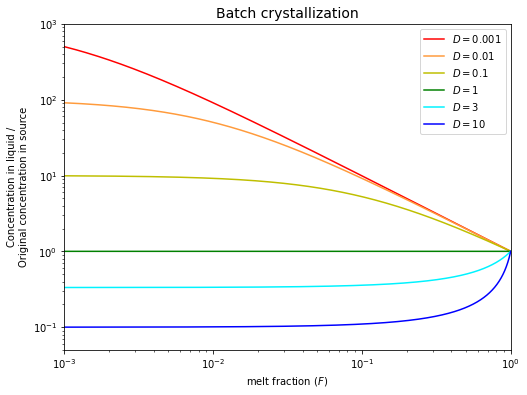

In [94]:
# Plot of CL/C0 against F at various D
plt.figure(figsize=(8,6))
F = np.linspace(0.001, 1, 10000)
D = [0.001, 0.01, 0.1, 1, 3, 10]
colors = ['r', '#FF9B3C', 'y', 'g', '#00F3FF', 'b']
for i in range(len(D)):
    ratio_CL_C0 = ratio_CL_C0_batch_crystallization(F, D[i])
    plt.plot(F, ratio_CL_C0, colors[i], label=f"$D={D[i]}$")
plt.xlabel('melt fraction ($F$)')
plt.ylabel('Concentration in liquid /\nOriginal concentration in source')
plt.xlim([0.001, 1])
plt.ylim([0.05, 1000])
plt.xscale("log")
plt.yscale("log")
plt.title('Batch crystallization', fontsize=14)
plt.legend(loc='best', fontsize=10)

The equilibrium crystallization model is nonetheless useful because it can be applied to the equilibration of two immiscible melts, which can both rapidly equilibrate internally by diffusion:

   * Equilibrium between a silicate melt and a metallic melt – relevant for core formation on Earth, where an Fe-rich melt segregated from the molten silicate mantle. Here we would use $K_D$ values for the system metallic meltsilicate melt.
   * Equilibrium between a silicate melt and an immiscible sulfide melt – relevant for the formation of sulfide-ore deposits and (at a smaller scale) the differentiation of many basaltic melts in near-surface magma chambers. Here we would use $K_D$ values for the system sulfide meltsilicate melt.

## Fractional crystallization
```{index} Fractional crystallization
```
Fractional crystallization assumes that an instantaneous equilibrium is achieved between the liquid and an (infinitesimally) thin surface layer of a solid crystal. In this case, the relevant partitioning equation is:

$$\frac{C_{L}}{C_0} = F^{D-1}$$

Fractional crystallization has a dramatic effect on compatible element abundances, as these are rapidly depleted in the melt.

Incompatible elements ($D < 1$) are enriched in the remaining melt, by a factor that is the inverse to the amount of liquid remaining. Hence, they do not change greatly in concentration until >90% of the magma has crystallized.

In [95]:
# function for calculating the CL/C0 ratio of remaining melt (fraction of melt remaining = F) after fractional crystallization
def ratio_CL_C0_fractional_crystallization(F, D):
    return F**(D-1)

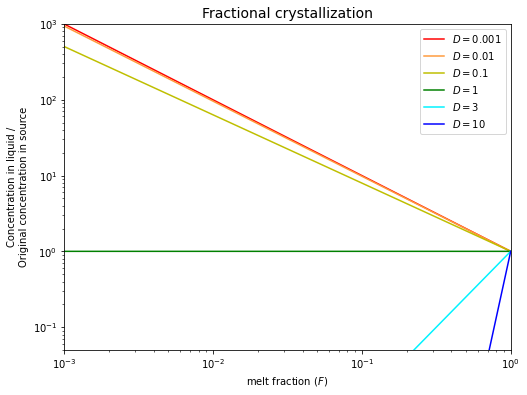

In [96]:
# Plot of CL/C0 against F at various D
plt.figure(figsize=(8,6))
F = np.linspace(0.001, 1, 10000)
D = [0.001, 0.01, 0.1, 1, 3, 10]
colors = ['r', '#FF9B3C', 'y', 'g', '#00F3FF', 'b']
for i in range(len(D)):
    # the equation describing the composition of a remaining liquid (fraction of melt remaining = F)
    ratio_CL_C0 = ratio_CL_C0_fractional_crystallization(F, D[i])
    plt.plot(F, ratio_CL_C0, colors[i], label=f"$D={D[i]}$")
plt.xlabel('melt fraction ($F$)')
plt.ylabel('Concentration in liquid /\nOriginal concentration in source')
plt.xlim([0.001, 1])
plt.ylim([0.05, 1000])
plt.xscale("log")
plt.yscale("log")
plt.title('Fractional crystallization', fontsize=14)
plt.legend(loc='best', fontsize=10)

Given

$$\frac{C_{L}}{C_0} = F^{D-1}$$

the trace element concentration of a crystal layer that is in equilibrium with a residual melt at a particular value of $F$ is

$$\frac{C_{S, increment}}{C_0} = DF^{D-1}$$

The mean trace element concentration of a crystal that is formed by crystallization between $F = 1$ and $F$ is

$$\frac{C_{S, aggregate}}{C_0} = \int_{F}^{1}\frac{C_{S, increment}}{C_0}dF = \int_{F}^{1}DF^{D-1}dF$$

$$\therefore \frac{C_{S, aggregate}}{C_0} = \frac{1-F^D}{1-F}$$



In [114]:
# function for calculating the CS/C0 ratio of aggregate crystal after fractional crystallization
def ratio_CS_aggregate_C0_fractional_crystallization(F, D):
    return (1 - F**D)/(1-F)

## Last remarks

Note that fractional crystallization and partial melting have opposite effects on trace element ratios:

   * Incompatible elements with small $D$ values are most readily fractionated from each other at small degrees of partial melting rather than by fractional crystallization.
   * Compatible elements are easy to fractionate from one another by fractional crystallization. Such fractionations are difficult to achieve by partial melting at values of $F$ that correspond to the formation of common basaltic magmas ($F \approx 5 - 15\%$).

## Problem Set 2

Assume a mantle source that is characterized by the following trace element concentrations: $0.703\,\mu g/g$ $Nd$, $0.273\,\mu g/g$ $Sm$, and $1880\,\mu g/g$ $Ni$. Use the partition coefficients from the handout for the following calculations.

(1) Calculate the $Nd$, $Sm$, and $Ni$ concentrations of a batch equilibrium partial melt that is formed at $F = 10\%$ by melting of a source with a spinel peridotite mineralogy ($66\%$ ol, $24\%$ opx, $8\%$ cpx and $2\%$ spinel). What are the $Nd$, $Sm$, and $Ni$ concentrations of the residual rock that are in equilibrium with the $10\%$ melt?

We have been given the original concentrations ($C_0$) of $Nd$, $Sm$, and $Ni$ in the source. So, we can find the concentrations of those elements in the melt produced by batch melting ($C_L$) by finding $\frac{C_L}{C_0}$ using the equation below and multiplying the ratio by $C_0$:

$$\frac{C_L}{C_0} = \frac{1}{F + D(1-F)}$$

After that, we can find the concentrations of those elements in the remaining solid ($C_S$) using the definition of bulk distribution coefficients:

$$D = \frac{C_S}{C_L}$$

But first of all, we need the distribution coefficients from the handout. See the table below.

In [115]:
# create a dataframe to show the distribution coefficients of some elements in some minerals acquired from the handout
minerals = ["Olivine (ol)", "Orthopyroxene (opx)", "Clinopyroxene (cpx)", "Spinel (sp)", "Garnet (gn)", "Plagioclase (plag)"]
KD_Rb = [4*10**-5, 0.005, 0.003, 5*10**-4, 0.007, 0.03]
KD_U = [2*10**-5, 0.001, 0.01, 0.001, 0.006, 0.05]
KD_Pb = [0.008, 0.01, 0.01, None, 1*10**-4, 1.1]
KD_Sr = [6*10**-5, 0.005, 0.16, 5*10**-4, 0.01, 3]
KD_Nd = [1*10**-4, 0.01, 0.28, 6*10**-4, 0.36, 0.04]
KD_Sm = [4*10**-4, 0.02, 0.46, 5*10**-4, 1.1, 0.03]
KD_Cr = [0.6, 2, 4, 200, 0.5, 0.02]
KD_Ni = [8, 4, 3, 10, 0.4, 0.04]

dict1 = {'' : minerals,
        'Rb' : KD_Rb,
        'U' : KD_U,
        'Pb' : KD_Pb,
        'Sr' : KD_Sr,
        'Nd' : KD_Nd,
        'Sm' : KD_Sm,
        'Cr' : KD_Cr,
        'Ni' : KD_Ni}
df1 = pd.DataFrame(dict1)
elements = ['Rb', 'U', 'Pb', 'Sr', 'Nd', 'Sm', 'Cr', 'Ni']
for e in elements:
    df1.loc[:, e] = df1[e].map('{:.1e}'.format)
print("Table 1: The distribution coefficients of some elements in some minerals.")
display(df1.style.hide_index())

Table 1: The distribution coefficients of some elements in some minerals.


,Rb,U,Pb,Sr,Nd,Sm,Cr,Ni
Olivine (ol),4.0e-05,2.0e-05,8.0e-03,6.0e-05,1.0e-04,4.0e-04,6.0e-01,8.0e+00
Orthopyroxene (opx),5.0e-03,1.0e-03,1.0e-02,5.0e-03,1.0e-02,2.0e-02,2.0e+00,4.0e+00
Clinopyroxene (cpx),3.0e-03,1.0e-02,1.0e-02,1.6e-01,2.8e-01,4.6e-01,4.0e+00,3.0e+00
Spinel (sp),5.0e-04,1.0e-03,nan,5.0e-04,6.0e-04,5.0e-04,2.0e+02,1.0e+01
Garnet (gn),7.0e-03,6.0e-03,1.0e-04,1.0e-02,3.6e-01,1.1e+00,5.0e-01,4.0e-01
Plagioclase (plag),3.0e-02,5.0e-02,1.1e+00,3.0e+00,4.0e-02,3.0e-02,2.0e-02,4.0e-02


In [116]:
# Question 1
# Elements
elements = ["Nd", "Sm", "Ni"]
# original concentration of Nd, Sm, Ni in the sources (C0)
C0_source = np.array([0.703, 0.273, 1880])  # µg/g
# the percentages of minerals (ol, opx, cpx, sp, gn, plag) in the source
minerals_percentages_1 = [66, 24, 8, 2, 0, 0]
# calculate the bulk distribution coefficient (D) of Nd, Sm, Ni in the source
D_1 = np.array(
    [bulk_distribution_coefficient_calculator(minerals_percentages_1, KD_Nd),
     bulk_distribution_coefficient_calculator(minerals_percentages_1, KD_Sm),
     bulk_distribution_coefficient_calculator(minerals_percentages_1, KD_Ni)])
# melt fraction (F)
F_1 = 0.1  # 10% melt
# calculate the concentration of Nd, Sm, Ni in the melt (CL)
CL_1 = ratio_CL_C0_batch_melting(F_1, D_1) * C0_source  # µg/g
# calculate the concentration of Nd, Sm, Ni in the remaining solid (CS)
CS_1 = CL_1 * D_1

# print answers
print("For fractional crystallization with F = %g (%g%% melt)," % (F_1, F_1*100))
for i in range(3):
    print("The %s concentration in the melt is %g µg/g, and that in the residual rock is %g µg/g." \
          % (elements[i], round_to_n_sf(CL_1[i], 3), round_to_n_sf(CS_1[i], 3)))

For fractional crystallization with F = 0.1 (10% melt),
The Nd concentration in the melt is 5.74 µg/g, and that in the residual rock is 0.143 µg/g.
The Sm concentration in the melt is 1.98 µg/g, and that in the residual rock is 0.083 µg/g.
The Ni concentration in the melt is 308 µg/g, and that in the residual rock is 2050 µg/g.


(2) Calculate the $Nd$, $Sm$, and $Ni$ concentrations of a batch equilibrium partial melt that is formed at $F = 3\%$ by melting of a source with a garnet peridotite mineralogy ($63\%$ ol, $30\%$ opx, $2\%$ cpx and $5\%$ garnet).

In [117]:
# Question 2
# the percentages of minerals (ol, opx, cpx, sp, gn, plag) in the source
minerals_percentages_2 = [63, 30, 2, 0, 5, 0]
# calculate the bulk distribution coefficient (D) of Nd, Sm, Ni in the source
D_2 = np.array(
    [bulk_distribution_coefficient_calculator(minerals_percentages_2, KD_Nd),
     bulk_distribution_coefficient_calculator(minerals_percentages_2, KD_Sm),
     bulk_distribution_coefficient_calculator(minerals_percentages_2, KD_Ni)])
# melt fraction (F)
F_2 = 0.03  # 3% melt
# calculate the concentration of Nd, Sm, Ni in the melt (CL)
CL_2 = ratio_CL_C0_batch_melting(F_2, D_2) * C0_source  # µg/g
# calculate the concentration of Nd, Sm, Ni in the remaining solid (CS)
CS_2 = CL_2 * D_2

# print answers
print("For fractional crystallization with F = %g (%g%% melt)," % (F_2, F_2*100))
for i in range(3):
    print("The %s concentration in the melt is %g µg/g, and that in the residual rock is %g µg/g." \
          % (elements[i], round_to_n_sf(CL_2[i], 3), round_to_n_sf(CS_2[i], 3)))

For fractional crystallization with F = 0.03 (3% melt),
The Nd concentration in the melt is 12.6 µg/g, and that in the residual rock is 0.336 µg/g.
The Sm concentration in the melt is 2.78 µg/g, and that in the residual rock is 0.196 µg/g.
The Ni concentration in the melt is 305 µg/g, and that in the residual rock is 1930 µg/g.


(3) Repeat the calculation of Question 2, but for an aggregate melt formed by fractional melting.

In [118]:
# Question 3
# calculate the concentration of Nd, Sm, Ni in the melt (CL)
CL_3 = ratio_CL_aggregate_C0_fractional_melting(F_2, D_2) * C0_source  # µg/g
# calculate the concentration of Nd, Sm, Ni in the remaining solid (CS)
CS_3 = CL_3 * D_2

# print answers
print("For fractional crystallization with F = %g (%g%% melt)," % (F_2, F_2*100))
for i in range(3):
    print("The %s concentration in the aggregate melt is %g µg/g, and that in the residual rock is %g µg/g." \
          % (elements[i], round_to_n_sf(CL_3[i], 3), round_to_n_sf(CS_3[i], 3)))

For fractional crystallization with F = 0.03 (3% melt),
The Nd concentration in the aggregate melt is 16 µg/g, and that in the residual rock is 0.425 µg/g.
The Sm concentration in the aggregate melt is 3.19 µg/g, and that in the residual rock is 0.225 µg/g.
The Ni concentration in the aggregate melt is 301 µg/g, and that in the residual rock is 1900 µg/g.


(4) The $10\%$ partial melt (of Question 1) pools in a magma chamber where it crystallizes partially, with crystals consisting of $40\%$ olivine and $60\%$ plagioclase. Calculate the $Nd$, $Sm$ and $Ni$ concentrations of the residual liquid, after $35\%$ of the melt has crystallized (solidified) by ideal fractional crystallization. What are the mean $Nd$, $Sm$, and $Ni$ contents of the fractionating assemblage?

In [119]:
# Question 4
# original concentration of Nd, Sm, Ni in the melt (C0)
C0_melt = CL_1  # µg/g
# the percentages of minerals (ol, opx, cpx, sp, gn, plag) in the source
minerals_percentages_4 = [40, 0, 0, 0, 0, 60]
# calculate the bulk distribution coefficient (D) of Nd, Sm, Ni in the source
D_4 = np.array(
    [bulk_distribution_coefficient_calculator(minerals_percentages_4, KD_Nd),
     bulk_distribution_coefficient_calculator(minerals_percentages_4, KD_Sm),
     bulk_distribution_coefficient_calculator(minerals_percentages_4, KD_Ni)])
# melt fraction (F)
F_4 = 1 - 0.35  # 35% of the melt has crystallized
# calculate the concentration of Nd, Sm, Ni in the melt (CL)
CL_4 = ratio_CL_C0_fractional_crystallization(F_4, D_4) * C0_melt  # µg/g
# calculate the concentration of Nd, Sm, Ni in the remaining solid (CS)
CS_4 = ratio_CS_aggregate_C0_fractional_crystallization(F_4, D_4) * C0_melt  # µg/g

# print answers
print("For fractional crystallization with F = %g (%g%% melt, i.e. %g%% of the melt has crystallized)," % (F_4, F_4*100, (1-F_4)*100))
for i in range(3):
    print("The %s concentration in the remaining melt is %g µg/g, and that in the fractionating assemblage is %g µg/g." \
          % (elements[i], round_to_n_sf(CL_4[i], 3), round_to_n_sf(CS_4[i], 3)))

For fractional crystallization with F = 0.65 (65% melt, i.e. 35% of the melt has crystallized),
The Nd concentration in the remaining melt is 8.75 µg/g, and that in the fractionating assemblage is 0.169 µg/g.
The Sm concentration in the remaining melt is 3.03 µg/g, and that in the fractionating assemblage is 0.0441 µg/g.
The Ni concentration in the remaining melt is 118 µg/g, and that in the fractionating assemblage is 660 µg/g.


(5) Calculate the $Sm/Nd$ and $Ni/Nd$ ratios of the original mantle source (MS), the melts M1, M2, M3, and M4 produced in Question 1, 2, 3, and 4, the solid residue S1 of Question 1 and the fractionating minerals F4 of Question 4.

$\quad$(a) If you compare MS with M1 and S1, what is the main reason for the large difference in $Ni/Nd$ ratio?

$\quad$(b) If you compare M1 with M2, what are the main reasons for the different $Sm/Nd$ ratios?

$\quad$(c) If you compare M4 with M1 and F4, what are the main reasons for the relatively similar $Sm/Nd$ ratios, whilst $Ni/Nd$ is very different?

In [122]:
# Question 5
# Calculate Sm/Nd and Ni/Nd ratios of the original mantle source (MS), 
# the melts M1, M2, M3, and M4 produced in Question 1, 2, 3, and 4, 
# the solid residue S1 of Question 1 and the fractionating minerals F4 of Question 4
Sm_Nd_ratio_MS = C0_source[1]/C0_source[0]
Ni_Nd_ratio_MS = C0_source[2]/C0_source[0]
Sm_Nd_ratio_M1 = CL_1[1]/CL_1[0]
Ni_Nd_ratio_M1 = CL_1[2]/CL_1[0]
Sm_Nd_ratio_M2 = CL_2[1]/CL_2[0]
Ni_Nd_ratio_M2 = CL_2[2]/CL_2[0]
Sm_Nd_ratio_M3 = CL_3[1]/CL_3[0]
Ni_Nd_ratio_M3 = CL_3[2]/CL_3[0]
Sm_Nd_ratio_M4 = CL_4[1]/CL_4[0]
Ni_Nd_ratio_M4 = CL_4[2]/CL_4[0]
Sm_Nd_ratio_S1 = CS_1[1]/CS_1[0]
Ni_Nd_ratio_S1 = CS_1[2]/CS_1[0]
Sm_Nd_ratio_S4 = CS_4[1]/CS_4[0]
Ni_Nd_ratio_S4 = CS_4[2]/CS_4[0]

# print answers
print("Sm/Nd of MS = %g." % round_to_n_sf(Sm_Nd_ratio_MS, 3))
print("Ni/Nd of MS = %g." % round_to_n_sf(Ni_Nd_ratio_MS, 3))
print("Sm/Nd of M1 = %g." % round_to_n_sf(Sm_Nd_ratio_M1, 3))
print("Ni/Nd of M1 = %g." % round_to_n_sf(Ni_Nd_ratio_M1, 3))
print("Sm/Nd of M2 = %g." % round_to_n_sf(Sm_Nd_ratio_M2, 3))
print("Ni/Nd of M2 = %g." % round_to_n_sf(Ni_Nd_ratio_M2, 3))
print("Sm/Nd of M3 = %g." % round_to_n_sf(Sm_Nd_ratio_M3, 3))
print("Ni/Nd of M3 = %g." % round_to_n_sf(Ni_Nd_ratio_M3, 3))
print("Sm/Nd of M4 = %g." % round_to_n_sf(Sm_Nd_ratio_M4, 3))
print("Ni/Nd of M4 = %g." % round_to_n_sf(Ni_Nd_ratio_M4, 3))
print("Sm/Nd of S1 = %g." % round_to_n_sf(Sm_Nd_ratio_S1, 3))
print("Ni/Nd of S1 = %g." % round_to_n_sf(Ni_Nd_ratio_S1, 3))
print("Sm/Nd of S4 = %g." % round_to_n_sf(Sm_Nd_ratio_S4, 3))
print("Ni/Nd of S4 = %g." % round_to_n_sf(Ni_Nd_ratio_S4, 3))

Sm/Nd of MS = 0.388.
Ni/Nd of MS = 2670.
Sm/Nd of M1 = 0.345.
Ni/Nd of M1 = 53.6.
Sm/Nd of M2 = 0.221.
Ni/Nd of M2 = 24.3.
Sm/Nd of M3 = 0.2.
Ni/Nd of M3 = 18.9.
Sm/Nd of M4 = 0.346.
Ni/Nd of M4 = 13.5.
Sm/Nd of S1 = 0.581.
Ni/Nd of S1 = 14400.
Sm/Nd of S4 = 0.261.
Ni/Nd of S4 = 3900.


(a) $Ni$ is compatible and remains in the residue whilst $Nd$ is incompatible and is concentrated in the melt.

(b) $Sm/Nd$ is different because (i) $F$ is variable and (ii) because $Sm$ is relatively compatible in garnet, which is in the source of M2 but not M1.

(c) Fractional crystallization is efficient at fractionating compatible element abundances ($Ni$) of melts, whilst incompatibles ($Sm$, $Nd$) are less affected.

## References

- Lecture slide and Practical for Lecture 2 of the High-Temperature Geochemistry module